In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import matplotlib.pyplot as plt

In [3]:
train_path = "./Data/Train.csv" 
test_path  = "./Data/Test.csv"

In [4]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
display(train_df.head() , test_df.head())

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


In [6]:
train_df['safe_text'][2] 

'#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD'

In [7]:
print(train_df['label'].value_counts())

 0.000000    4908
 1.000000    4053
-1.000000    1038
 0.666667       1
Name: label, dtype: int64


In [6]:
print(f" Shape of train_df data frame: {train_df.shape}\n Shape of test_df data frame: {test_df.shape}")

 Shape of train_df data frame: (10001, 4)
 Shape of test_df data frame: (5177, 2)


In [7]:
train_df['safe_text'][1]

"I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day"

**DATA UNDERSTANDING**

The folllowing will be explored to better interpret the datasets being used

*   check for data info
*   Check for missing values
*   Check for duplicates
*   Check for unique values
*   create visuals

In [8]:
print(train_df.isnull().sum(),'\n')
print(test_df.isnull().sum())

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64 

tweet_id     0
safe_text    1
dtype: int64


In [9]:
train_df.dropna(inplace = True)
test_df.dropna(inplace = True)

In [10]:
print(train_df.isnull().sum(),'\n')
print(test_df.isnull().sum())

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64 

tweet_id     0
safe_text    0
dtype: int64


In [11]:
#Rename the safe_text column to tweets to conform to tweet_id
train_df.rename(columns= {"safe_text": "tweets"}, inplace= True)
test_df.rename(columns= {"safe_text": "tweets"}, inplace= True)

In [12]:
test_df.head()

,tweet_id,tweets
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


In [13]:
##create copies of the datasets
train_data= train_df.copy()
test_data= test_df.copy()

In [14]:
train_df.isna().sum()

tweet_id     0
tweets       0
label        0
agreement    0
dtype: int64

In [15]:
test_df.isna().sum()

tweet_id    0
tweets      0
dtype: int64

**DUPLICATES**

In [8]:
train_df.duplicated().sum()
# train_df[train_df.duplicated()]

0

In [17]:
test_df.duplicated().sum()

0

**Remarks** : 
There are no duplicates

### **UNIQUE VALUES**

In [18]:
train_df.label.unique()
#  0 , 1 , -1

array([ 0.,  1., -1.])

In [19]:
positive = train_df[train_df["label"]==  1]
negative = train_df[train_df["label"]== -1]
neutral  = train_df[train_df["label"]==  0]

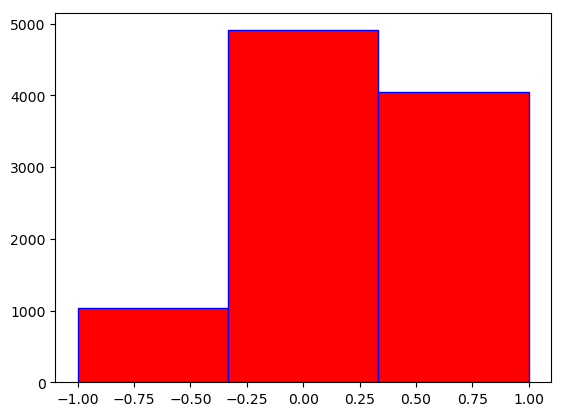

In [20]:
# plot_1=px.histogram(data_frame= train_df, x= "label", title= "Distribution of Sentiments") 
plt.hist(train_df['label'], bins=3, color='red', edgecolor='blue')                    
plt.show()

### Stopword count

In [9]:
import spacy 
nlp = spacy.load("en_core_web_md")

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.

In [22]:
from spacy.lang.en.stop_words import STOP_WORDS

In [23]:
len(STOP_WORDS)

326

In [24]:
# Stopword counts 
train_df['stop_word'] = train_df['tweets'].apply(lambda coun : len([t for t in coun.split() if t in STOP_WORDS]))
train_df.head()

,tweet_id,tweets,label,agreement,stop_word
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,8
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0,14
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,4


In [25]:
# coun = "this is vishal kumar here I find stop words"
# for t in coun.split():
#     if t in STOP_WORDS:
#         print(t)

In [26]:
# Count numaric in dataset
train_df['numaric'] = train_df['tweets'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))
train_df.head() 

,tweet_id,tweets,label,agreement,stop_word,numaric
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,0,0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,8,0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,0,0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0,14,0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,4,1


## Preprocessing and Cleaning:

### 1. Convert to Lower case

In [27]:
# CONVERT TO lOWER CASE :
train_df['tweets'] = train_df['tweets'].apply(lambda x : x.lower())
train_df.head(2)

,tweet_id,tweets,label,agreement,stop_word,numaric
0,CL1KWCMY,me &amp; the big homie meanboy3000 #meanboy #m...,0.0,1.0,0,0
1,E3303EME,i'm 100% thinking of devoting my career to pro...,1.0,1.0,8,0


In [28]:
# CONVERT TO lOWER CASE :
test_df['tweets'] = test_df['tweets'].apply(lambda x : x.lower())
test_df.head(2)

,tweet_id,tweets
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,students starting school without whooping coug...


### 2. Remove Punctuation and special character 

`re.sub()` is a function provided by the `re` module in Python, which stands for "regular expression substitution". It is used for replacing occurrences of a pattern in a string with another string.

Here's the basic syntax of re.sub(): <br>
`re.sub(pattern, replacement, string, count=0, flags=0)`<br>
**Example**
```
string = "The quick brown fox jumps over the lazy dog."
pattern = r"\b\w{4}\b"  # Matches words with exactly four characters
replacement = "****"
new_string = re.sub(pattern, replacement, string)
print(new_string)
```
The output is: <br>
`The **** **** fox **** **** the **** dog.`


In [29]:
import re
train_df['tweets'] = train_df['tweets'].apply(lambda x : re.sub('[^\w\s]+','',x))
train_df.head(3)

,tweet_id,tweets,label,agreement,stop_word,numaric
0,CL1KWCMY,me amp the big homie meanboy3000 meanboy mb mb...,0.0,1.0,0,0
1,E3303EME,im 100 thinking of devoting my career to provi...,1.0,1.0,8,0
2,M4IVFSMS,whatcausesautism vaccines do not vaccinate you...,-1.0,1.0,0,0


In [30]:
test_df['tweets'] = test_df['tweets'].apply(lambda x : re.sub('[^\w\s]+','',x))
test_df.head(3)

,tweet_id,tweets
0,00BHHHP1,user user amp 4 a vaccine given 2 healthy pee...
1,00UNMD0E,students starting school without whooping coug...
2,01AXPTJF,im kinda over every ep of user being ripped fr...


#### There is another way to remove all special and punctuation mark from text by using spacy

In [31]:
%%time
train_df['tweets']=train_df['tweets'].apply(lambda x: " ".join(token.text for token in nlp(x) if token.is_alpha or token.is_digit))

Wall time: 2min 51s


In [32]:
train_df['tweets'][100]

'user conservative neurosurgeon ben carson says vaccines are a public health issue url 1 thing i agree with him on'

### 3. Contaction to Expansion > can't TO can not ,you'll TO you will

In [33]:
# Contaction to Expansion > can't TO can not ,you'll TO you will
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [34]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x 

In [35]:
cont_to_exp("y'all")

'you all'

In [36]:
cont_to_exp("vishal")

'vishal'

In [37]:
%%time
train_df['tweets'] = train_df['tweets'].apply(lambda x : cont_to_exp(x))
test_df['tweets'] = test_df['tweets'].apply(lambda x: cont_to_exp(x))

Wall time: 1.04 s


### Count and Remove all emails

In [38]:
import re
# Regular expression pattern to match email addresses
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

In [39]:
train_df['emails'] = train_df['tweets'].apply(lambda i : re.findall(email_pattern , i))
train_df['email-counts'] =train_df['emails'].apply(lambda i : len(i))
train_df[train_df['email-counts'] > 0]

,tweet_id,tweets,label,agreement,stop_word,numaric,emails,email-counts


Hence there is no email id in the tweets col

In [40]:
train_df['tweets'] = train_df['tweets'].apply(lambda x : re.sub(email_pattern , '' , x))
test_df['tweets'] = test_df['tweets'].apply(lambda x : re.sub(email_pattern , '' , x))
train_df.head()

,tweet_id,tweets,label,agreement,stop_word,numaric,emails,email-counts
0,CL1KWCMY,me amp the big homie meanboy mb mbs mmr stegma...,0.0,1.0,0,0,[],0
1,E3303EME,i m 100 thinking of devoting my career to prov...,1.0,1.0,8,0,[],0
2,M4IVFSMS,whatcausesautism vaccines do not vaccinate you...,-1.0,1.0,0,0,[],0
3,1DR6ROZ4,i mean if they immunize my kid with something ...,-1.0,1.0,14,0,[],0
4,J77ENIIE,thanks to user catch me performing at la nuit ...,0.0,1.0,4,1,[],0


In [41]:
train_df.drop( columns = ['emails','email-counts'] ,inplace = True)
train_df.head(2)

,tweet_id,tweets,label,agreement,stop_word,numaric
0,CL1KWCMY,me amp the big homie meanboy mb mbs mmr stegma...,0.0,1.0,0,0
1,E3303EME,i m 100 thinking of devoting my career to prov...,1.0,1.0,8,0


### 5 Count and Remove URLs 

In [42]:
a = " watch our channal, http://khanyoutube.com/rehanraza"
re.findall(r'https?://[^\s<>"]+|www\.[^\s<>"]+', a)

['http://khanyoutube.com/rehanraza']

In [43]:
url_pattern = 'https?://[^\s<>"]+|www\.[^\s<>"]+'
train_df['tweets'] = train_df['tweets'].apply(lambda i : re.sub(url_pattern,'', i))
test_df['tweets'] = test_df['tweets'].apply(lambda i : re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+','', i))
train_df.head()


,tweet_id,tweets,label,agreement,stop_word,numaric
0,CL1KWCMY,me amp the big homie meanboy mb mbs mmr stegma...,0.0,1.0,0,0
1,E3303EME,i m 100 thinking of devoting my career to prov...,1.0,1.0,8,0
2,M4IVFSMS,whatcausesautism vaccines do not vaccinate you...,-1.0,1.0,0,0
3,1DR6ROZ4,i mean if they immunize my kid with something ...,-1.0,1.0,14,0
4,J77ENIIE,thanks to user catch me performing at la nuit ...,0.0,1.0,4,1


### 6. Remove multiple Space

In [44]:
# Remove multiple spaces 
x = "Thanks for     watching and     please           subscirbe this   video"
print("@".join(x.split()))
print(" ".join(x.split()))

Thanks@for@watching@and@please@subscirbe@this@video
Thanks for watching and please subscirbe this video


In [45]:
train_df['tweets'] = train_df['tweets'].apply(lambda x : " ".join(x.split()))
test_df['tweets'] = test_df['tweets'].apply(lambda x : " ".join(x.split()))
train_df.tail(5)

,tweet_id,tweets,label,agreement,stop_word,numaric
9996,IU0TIJDI,living in a time where the sperm i used to was...,1.0,1.000000,15,0
9997,WKKPCJY6,user user in spite of all measles outbreaks ju...,1.0,0.666667,7,0
9998,ST3A265H,interesting trends in child immunization in ok...,0.0,1.000000,4,0
9999,6Z27IJGD,cdc says measles are at highest levels in deca...,0.0,1.000000,3,0
10000,P6190L3Q,pneumonia vaccine for women w risk of pulmonar...,1.0,0.666667,4,0


### 7. Remove Stopwords

In [46]:
# Remove stopwords
# Example
x = "this is stopwords removal code use this"
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stopwords removal code use'

In [47]:
train_df['tweets'] = train_df['tweets'].apply(lambda x : " ".join([t for t in x.split() if t not in STOP_WORDS]))
test_df['tweets'] = test_df['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))
test_df.head(3)

,tweet_id,tweets
0,00BHHHP1,user user amp 4 vaccine given 2 healthy peeps ...
1,00UNMD0E,students starting school whooping cough vaccin...
2,01AXPTJF,im kinda ep user ripped headlines measles lets...


In [48]:
train_df.head(2)

,tweet_id,tweets,label,agreement,stop_word,numaric
0,CL1KWCMY,amp big homie meanboy mb mbs mmr stegmanlife s...,0.0,1.0,0,0
1,E3303EME,m 100 thinking devoting career proving autism ...,1.0,1.0,8,0


In [49]:
# Stopword counts 
train_df['stop_word'] = train_df['tweets'].apply(lambda coun : len([t for t in coun.split() if t in STOP_WORDS]))
train_df[train_df['stop_word'] != 0]
# Hence there is no Stopwords in the file

,tweet_id,tweets,label,agreement,stop_word,numaric


### 8. Remove Number

In [50]:
x = "learning How to remove number from meassage 1 like 2 and 19"
" ".join(t for t in x.split() if t.isdigit() is False )

'learning How to remove number from meassage like and'

Code for remove numbers from tweets

In [51]:
train_df['tweets'] = train_df['tweets'].apply(lambda x : " ".join([t for t in x.split() if t.isdigit() is False]))
test_df['tweets'] = test_df['tweets'].apply(lambda x : " ".join([t for t in x.split() if t.isdigit() is False]))
train_df.head(4)

,tweet_id,tweets,label,agreement,stop_word,numaric
0,CL1KWCMY,amp big homie meanboy mb mbs mmr stegmanlife s...,0.0,1.0,0,0
1,E3303EME,m thinking devoting career proving autism nt c...,1.0,1.0,0,0
2,M4IVFSMS,whatcausesautism vaccines vaccinate child,-1.0,1.0,0,0
3,1DR6ROZ4,mean immunize kid wo nt secretly kill years li...,-1.0,1.0,0,0


Checking counts of number in tweets, it should be zero

In [52]:
train_df['numaric'] = train_df['tweets'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))
train_df[train_df['numaric']!=0]

,tweet_id,tweets,label,agreement,stop_word,numaric


Hence there is no numaric value in dataset

In [53]:
# Here we drop stop_word and numaric columns.
train_df.drop(columns = ['stop_word','numaric'] , inplace = True)

In [54]:
# This is final data set
train_df.head(2) 

,tweet_id,tweets,label,agreement
0,CL1KWCMY,amp big homie meanboy mb mbs mmr stegmanlife s...,0.0,1.0
1,E3303EME,m thinking devoting career proving autism nt c...,1.0,1.0


In [55]:
test_df.head(2)

,tweet_id,tweets
0,00BHHHP1,user user amp vaccine given healthy peeps fda ...
1,00UNMD0E,students starting school whooping cough vaccin...


### 9. Remove most frequent words

In [56]:
# We have removed stopwords but also we have some words which is frequntly used in dataset :

#First we will join all dataset like this 
" ".join(train_df.head(2)['tweets'])

'amp big homie meanboy mb mbs mmr stegmanlife stegman st url m thinking devoting career proving autism nt caused vaccines idiotic posts ve seen world autism day'

In [57]:
# Lets join whole dataset of tweets
whole_tweets=" ".join(train_df['tweets'])

In [58]:
print(whole_tweets)
doc = nlp(whole_tweets)
split_text = whole_tweets.split()

amp big homie meanboy mb mbs mmr stegmanlife stegman st url m thinking devoting career proving autism nt caused vaccines idiotic posts ve seen world autism day whatcausesautism vaccines vaccinate child mean immunize kid wo nt secretly kill years line m nt trust thanks user catch performing la nuit nyc ave starts jennifair mmr url user nearly year old study mental health studies vaccines relatively infancies refuted study kids finds link mmr vaccine autism url psa vaccinate fucking kids coughing extra shuttle thinks measles vaccinateyourkids aids vaccine created oregon health amp science university clear virus body url url user point text butwbon jovi cover playin alibis hope u come mmr bbquser b prediction vaccine exemption arizona end soon money lost big pharma getting vaccines china nervous moving cheryl southern nevada health district url noche user mmr mixmasterrod dcdj mmr mad hatter url got influenza vaccine purdue university student health push user url enroll meningococcal dise

In [59]:
print(len(doc) ,  "   " ,len(split_text))

98053     98053


In [60]:
freq_words_spacy = pd.Series([t.text for t in doc]).value_counts()
freq_words_spacy

user                  5494
url                   4630
measles               3512
vaccine               1558
nt                    1466
vaccines              1308
kids                  1263
health                1123
mmr                    984
vaccinate              975
children               839
people                 701
autism                 656
vaccinated             610
outbreak               596
immunity               565
vaccinations           559
amp                    533
parents                519
child                  467
vaccination            458
school                 438
cases                  419
flu                    409
m                      389
disease                363
like                   358
new                    337
got                    320
s                      316
                      ... 
fences                   1
margen                   1
digs                     1
birmingham               1
robyn                    1
chemung                  1
b

In [61]:
freq_word_split = pd.Series(split_text).value_counts()
freq_word_split

user                  5494
url                   4630
measles               3512
vaccine               1558
nt                    1466
vaccines              1308
kids                  1263
health                1123
mmr                    984
vaccinate              975
children               839
people                 701
autism                 656
vaccinated             610
outbreak               596
immunity               565
vaccinations           559
amp                    533
parents                519
child                  467
vaccination            458
school                 438
cases                  419
flu                    409
m                      389
disease                363
like                   358
new                    337
got                    320
s                      316
                      ... 
fences                   1
margen                   1
digs                     1
birmingham               1
robyn                    1
chemung                  1
b

In [62]:
freq_word_split['amp']

533

<font color=green>Here we see the most used word is <font color = blue>url -> 5494, user- > 4639</font> so we can eliminate this.</font>

**Final code to remove Common words and Rare words**

In [63]:
Fc2 = freq_words_spacy[0:2]
rare_word = freq_words_spacy[freq_words_spacy.values == 1]
# Skip to remove rare words because, we have 7701 rare word out of 10,000 words. so cazz
# fr20 =  freq_words_spacy[-20:0]

In [64]:
train_df['tweets'] = train_df['tweets'].apply(lambda x : " ".join([t for t in x.split() if t not in Fc2]))

In [65]:
# # For checking 
# whole_tweets=" ".join(train_df['tweets'])
# split_text = whole_tweets.split()
# print("Length of whole tweets in dataset : " ,len(split_text))
# freq_w=pd.Series(split_text).value_counts()
# freq_w[0:5]

Here you can see there is no **url** and **users**.
So this task is done.

## Lemmatization using spacy

In [66]:
import spacy 
def lemmatize_text(text):
    doc = nlp(text)
    lemma_text = " ".join(token.lemma_ for token in doc)
    return lemma_text 

In [67]:
train_df['lemmatized_tweets'] = train_df['tweets'].apply(lemmatize_text)
train_df.head(10)

,tweet_id,tweets,label,agreement,lemmatized_tweets
0,CL1KWCMY,amp big homie meanboy mb mbs mmr stegmanlife s...,0.0,1.000000,amp big homie meanboy mb mbs mmr stegmanlife s...
1,E3303EME,m thinking devoting career proving autism nt c...,1.0,1.000000,m think devote career prove autism not cause v...
2,M4IVFSMS,whatcausesautism vaccines vaccinate child,-1.0,1.000000,whatcausesautism vaccine vaccinate child
3,1DR6ROZ4,mean immunize kid wo nt secretly kill years li...,-1.0,1.000000,mean immunize kid will not secretly kill year ...
4,J77ENIIE,thanks catch performing la nuit nyc ave starts...,0.0,1.000000,thank catch perform la nuit nyc ave start jenn...
5,OVNPOAUX,nearly year old study mental health studies va...,1.0,0.666667,nearly year old study mental health study vacc...
6,JDA2QDV5,study kids finds link mmr vaccine autism,1.0,0.666667,study kid find link mmr vaccine autism
7,S6UKR4OJ,psa vaccinate fucking kids,1.0,1.000000,psa vaccinate fucking kid
8,V6IJATBE,coughing extra shuttle thinks measles vaccinat...,1.0,0.666667,cough extra shuttle think measle vaccinateyourkid
9,VB25IDQK,aids vaccine created oregon health amp science...,1.0,0.666667,aids vaccine create oregon health amp science ...


## Splliting dataset

In [143]:
X = train_df['lemmatized_tweets'] 
y = train_df['label']
print(X)
print(y)

0        amp big homie meanboy mb mbs mmr stegmanlife s...
1        m think devote career prove autism not cause v...
2                 whatcausesautism vaccine vaccinate child
3        mean immunize kid will not secretly kill year ...
4        thank catch perform la nuit nyc ave start jenn...
5        nearly year old study mental health study vacc...
6                   study kid find link mmr vaccine autism
7                                psa vaccinate fucking kid
8        cough extra shuttle think measle vaccinateyourkid
9        aids vaccine create oregon health amp science ...
10       point text butwbon jovi cover playin alibi hop...
11       prediction vaccine exemption arizona end soon ...
12       get vaccine china nervous move cheryl southern...
13              noche mmr mixmasterrod dcdj mmr mad hatter
14       get influenza vaccine purdue university studen...
15       enroll meningococcal diseasepupil immunize rec...
16       increase number parent skip vaccination childr.

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33  ,  random_state=42)

In [145]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(6699,) (3300,)
(6699,) (3300,)


## Transform Counts to Frequencies with Tf-idf
While counting words is helpful, longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)  # but this line do both count vectorization and TFIDF transformation.
(X_train_tfidf)

<6699x9195 sparse matrix of type '<class 'numpy.float64'>'
	with 56056 stored elements in Compressed Sparse Row format>

In [149]:
X_test_tfidf = vectorizer.transform(X_test)  # but this line do both count vectorization and TFIDF transformation.
X_test_tfidf

<3300x9195 sparse matrix of type '<class 'numpy.float64'>'
	with 24919 stored elements in Compressed Sparse Row format>

In [150]:
X_train_tfidf

<6699x9195 sparse matrix of type '<class 'numpy.float64'>'
	with 56056 stored elements in Compressed Sparse Row format>

In [151]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Train a Classifier
Here we'll introduce an SVM classifier that's similar to SVC, called [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). LinearSVC handles sparse input better, and scales well to large numbers of samples.

In [218]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.svm import LinearSVC
modelsvc = LinearSVC(max_iter=2000)
from sklearn.linear_model import LogisticRegression
modellrg=LogisticRegression(max_iter = 1000)
from sklearn.ensemble import RandomForestClassifier
modelrfc = RandomForestClassifier()

C:\Users\91896\anaconda3\envs\nlp_course\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\91896\anaconda3\envs\nlp_course\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gr

In [167]:
modelsvc.fit(X_train_tfidf , y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=2000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [168]:
modellrg.fit(X_train_tfidf , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [222]:
modelrfc.fit(X_train_tfidf , y_train)

C:\Users\91896\anaconda3\envs\nlp_course\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\91896\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\91896\anaconda3\envs\nlp_course\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecate

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [169]:
# For Train data by LinearSVC
X_train_svc_pred = modelsvc.predict(X_train_tfidf)
X_train_svc_acc = metrics.accuracy_score(y_train,X_train_svc_pred)
# Print the overall accuracy
print("Print accuracy score of training data" , X_train_svc_acc)

Print accuracy score of training data 0.9474548440065681


In [170]:
# For Test data by LinearSVC
X_test_svc_pred = modelsvc.predict(X_test_tfidf)
X_test_svc_acc = metrics.accuracy_score(y_test,X_test_svc_pred)
# Print the overall accuracy
print("Print accuracy score of testing data" , X_test_svc_acc)

Print accuracy score of training data 0.7133333333333334


In [171]:
# For train data by Logistic Regression 
X_train_lrg_pred = modellrg.predict(X_train_tfidf)
X_train_lrg_acc = metrics.accuracy_score(y_train , X_train_lrg_pred)
# Print the overall accuracy
print("Print accuracy score of training data" , X_train_lrg_acc)

Print accuracy score of training data 0.8048962531721152


In [172]:
# For testing data by Logistic Regression 
X_test_lrg_pred = modellrg.predict(X_test_tfidf)
X_test_lrg_acc = metrics.accuracy_score(y_test , X_test_lrg_pred)
# Print the overall accuracy
print("Print accuracy score of testing data" , X_test_lrg_acc)

Print accuracy score of training data 0.7257575757575757


In [224]:
# For traing data by Random Forest
X_train_rfc_pred = modelrfc.predict(X_train_tfidf)
X_train_rfc_acc = metrics.accuracy_score(y_train , X_train_rfc_pred)
# Print the overall accuracy
print("Print accuracy score of training data" , X_train_rfc_acc)

Print accuracy score of testing data 0.9834303627407076


C:\Users\91896\anaconda3\envs\nlp_course\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\91896\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [225]:
# For testing data by Random Forest
X_test_rfc_pred = modelrfc.predict(X_test_tfidf)
X_test_rfc_acc = metrics.accuracy_score(y_test , X_test_rfc_pred)
# Print the overall accuracy
print("Print accuracy score of testing data" , X_test_rfc_acc)

Print accuracy score of testing data 0.6984848484848485


C:\Users\91896\anaconda3\envs\nlp_course\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\91896\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [216]:
x = [train_df['lemmatized_tweets'][65]]
print(x)
x1 = ['vaccine brain damge your health']
modellrg.predict(vectorizer.transform(x1))

['vaccine brain damage cover implode discuss cdcwhistleblower']


array([-1.])